# Leer datasets

In [44]:
import pandas as pd
import numpy as np

moon = pd.read_csv('../data/moon_noisy.csv')
moon.head()

,X1,X2,X3,label
0,0.682988,-0.345203,-0.150472,1
1,2.040990,-0.131615,0.385426,1
2,-0.139752,0.454391,-0.242465,1
3,0.885748,0.286342,0.127170,0
4,1.182459,-0.497711,-0.165811,1


In [45]:
moon.drop(columns=['label'], inplace=True)

# Realizamos los clusters

In [46]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(moon)
kmeans_labels = kmeans.labels_
dbscan = DBSCAN(eps=0.28, min_samples=5)
dbscan.fit(moon)
dbscan_labels = dbscan.labels_
print(dbscan_labels)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(moon)
gmm_labels = gmm.predict(moon)

[ 0  0  0  1  0  0  0  1  3  0 -1  1  0  1  0  0  2  0  1  0  1  1 -1  0
  1  1  0  2 -1  0  1  0  1 -1  0  1  3 -1  1  1  1 -1  0  1  1  1 -1 -1
  1  0  0  1  0 -1 -1  0  1  1  4  1  0  1  3  0  0  1  1 -1  1  0  1  1
  0  0  1  0  1 -1  1  2 -1  0  1  1 -1 -1  1  1 -1  1  4  1  1  0  1 -1
  0  1  0  1  0  1 -1  4  0  0  1  1  4  1  1  0  1  0 -1  1  1  2  4 -1
  1  0  0 -1  1  0  1  1 -1  0  1  1  0  1 -1  0  0  0  4  3  1  1 -1 -1
  0 -1  1  1  1  1  0  1  0  0  2  0  0  1  4  1  0  0  1  1 -1  1  0  0
  0 -1  1  0  0  1  1 -1  1  1  2  1  0  3  0  0 -1  0 -1  0 -1  1  1 -1
  0 -1  0  1 -1  0  1  0  1  1  1  0  0  0  2  1  1  1 -1 -1 -1  1  0  1
  1 -1  0 -1  1  0  0  0  1  0 -1 -1  0  0  1  0 -1  0  0  1  1  1  0  0
  0 -1  0  1 -1  1 -1  0  0  1  1  1  1  3  1  1  1 -1  0 -1  1  1  0  1
  1 -1 -1  1 -1  0 -1  1 -1  0  2  0  0  1 -1  0  0 -1 -1 -1 -1  0  1  1
  0  1 -1  0 -1  2  1  0  1  1  0  1]


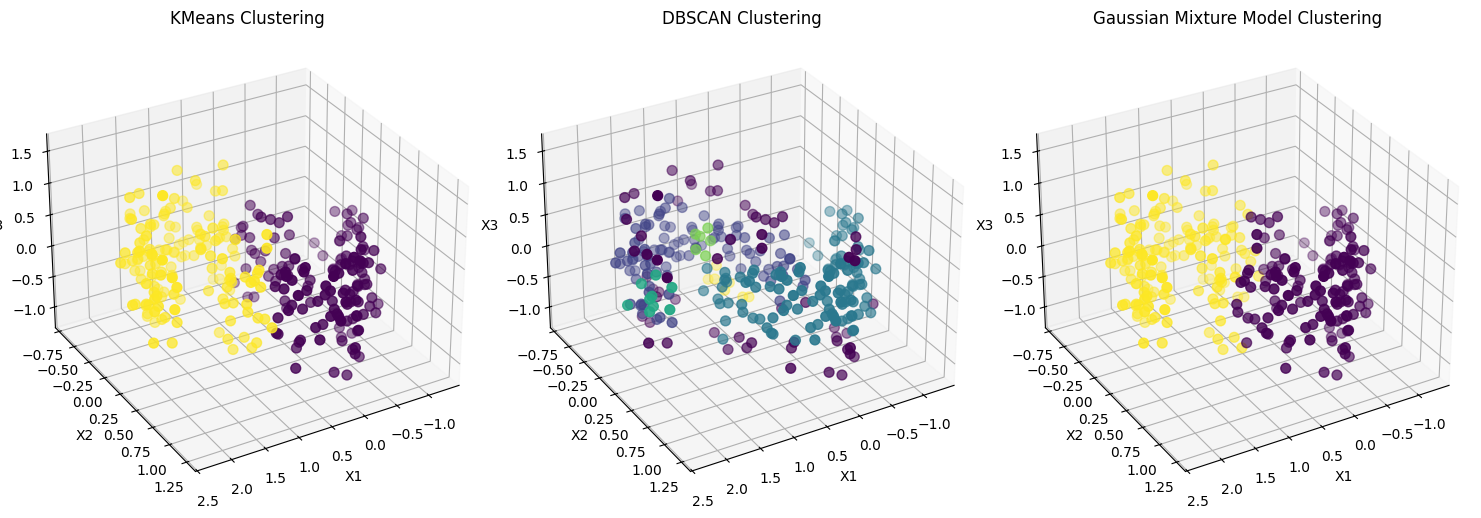

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(moon.iloc[:, 0], moon.iloc[:, 1], moon.iloc[:, 2], c=kmeans_labels, cmap='viridis', s=50)
ax1.set_title('KMeans Clustering')
ax1.set_xlabel(moon.columns[0])
ax1.set_ylabel(moon.columns[1])
ax1.set_zlabel(moon.columns[2])
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(moon.iloc[:, 0], moon.iloc[:, 1], moon.iloc[:, 2], c=dbscan_labels, cmap='viridis', s=50)
ax2.set_title('DBSCAN Clustering')
ax2.set_xlabel(moon.columns[0])
ax2.set_ylabel(moon.columns[1])
ax2.set_zlabel(moon.columns[2])
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(moon.iloc[:, 0], moon.iloc[:, 1], moon.iloc[:, 2], c=gmm_labels, cmap='viridis', s=50)
ax3.set_title('Gaussian Mixture Model Clustering')
ax3.set_xlabel(moon.columns[0])
ax3.set_ylabel(moon.columns[1])
ax3.set_zlabel(moon.columns[2])
ax1.view_init(elev=30, azim=60)
ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=30, azim=60) 
plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(moon, kmeans_labels)
dbscan_silhouette = silhouette_score(moon, dbscan_labels)
gmm_silhouette = silhouette_score(moon, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.40
DBSCAN Silhouette Score: -0.07
Gaussian Mixture Model Silhouette Score: 0.38


# Interpretar

In [49]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [50]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(moon, kmeans_labels, test_size=0.2, random_state=42)


In [51]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [-0.20720635  0.58425958 -0.04653727]
Cluster 1: [ 1.19947914 -0.06713407  0.03330121]


In [52]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.97


In [53]:
ripper.print_rules()


Reglas para clase: 0
[[X1=0.029-0.21] V [X1=-0.84--0.25] V [X1=<-0.84] V [X1=-0.25-0.029] V [X1=0.21-0.44^X2=0.8-0.91] V [X1=0.21-0.44^X2=>0.91] V [X1=0.21-0.44^X2=-0.25--0.057]]

Reglas para clase: 1
[[X1=1.26-1.75] V [X1=0.9-1.26] V [X1=>1.75] V [X1=0.72-0.9] V [X2=-0.41--0.25] V [X2=<-0.41] V [X1=0.44-0.72^X2=0.42-0.58]]


Decision Tree Accuracy: 1.00


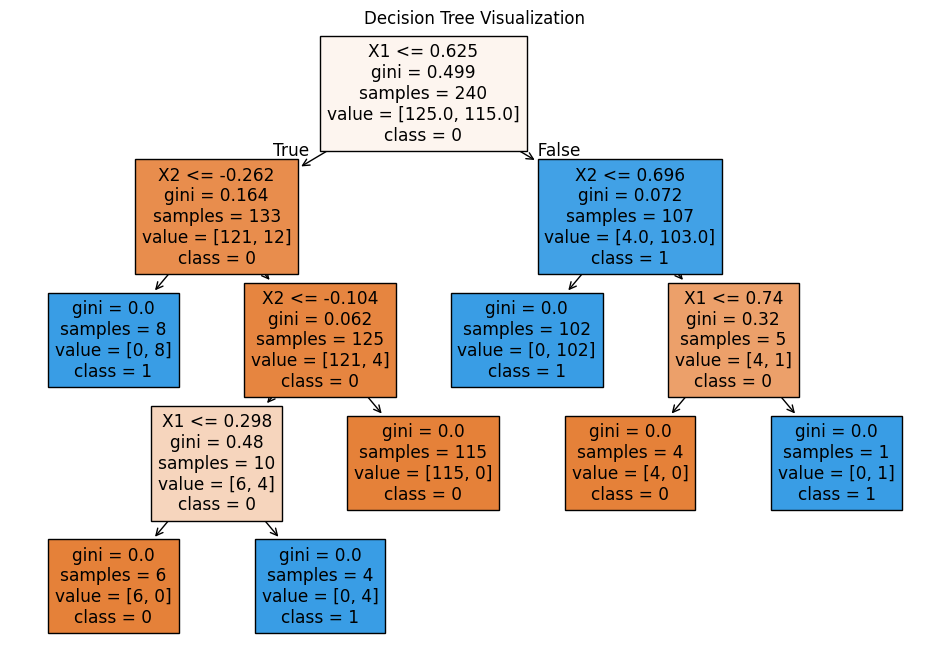

In [54]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=moon.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [55]:
ds = DSClassifierMultiQ(2, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=moon.columns.tolist())


Optimization started

Training time: 8.48s, epochs: 200

Least training loss reached: 0.059


In [56]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.761] R7: X2 > 0.599
			0: 0.761	1: 0.000	Unc: 0.239

	[0.749] R0: X1 < -0.115
			0: 0.749	1: 0.000	Unc: 0.251

	[0.720] R1: -0.115 < X1 < 0.477
			0: 0.720	1: 0.000	Unc: 0.280

Most important rules for class 1

	[0.719] R3: X1 > 1.069
			0: 0.000	1: 0.719	Unc: 0.281

	[0.700] R2: 0.477 < X1 < 1.069
			0: 0.000	1: 0.700	Unc: 0.300

	[0.679] R4: X2 < -0.055
			0: 0.000	1: 0.679	Unc: 0.321


In [57]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.92


## DBSCAN

In [58]:
#dividir los datos en entrenamiento y prueba
n_clusters = len(np.unique(dbscan_labels))
max_label = np.max(dbscan_labels)
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(moon, dbscan_labels, test_size=0.2, random_state=42)
print(f'Number of clusters in DBSCAN: {n_clusters}')

Number of clusters in DBSCAN: 6


In [59]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.70


In [60]:
ripper.print_rules()


Reglas para clase: 0
[[X1=1.26-1.75] V [X2=<-0.41^X1=0.9-1.26] V [X2=-0.41--0.25] V [X1=0.029-0.21^X2=-0.057-0.15] V [X2=-0.25--0.057] V [X1=0.029-0.21^X2=0.42-0.58] V [X1=-0.25-0.029^X2=0.42-0.58]]

Reglas para clase: 1
[[X1=<-0.84] V [X2=0.8-0.91^X1=0.44-0.72] V [X2=>0.91^X3=-0.0065-0.13] V [X1=-0.84--0.25] V [X2=>0.91^X3=-0.095--0.0065] V [X1=0.72-0.9^X2=0.15-0.28] V [X2=0.58-0.8] V [X2=0.42-0.58^X1=0.72-0.9] V [X2=0.8-0.91] V [X2=0.42-0.58^X1=0.9-1.26] V [X2=>0.91^X3=-0.23--0.095] V [X2=0.28-0.42^X3=-0.34--0.23]]

Reglas para clase: 2
[[X1=>1.75^X2=0.28-0.42] V [X1=>1.75^X2=0.15-0.28] V [X1=>1.75^X2=0.42-0.58]]

Reglas para clase: 3
[[X2=-0.057-0.15^X1=0.9-1.26]]

Reglas para clase: 4
[[X3=<-0.63^X1=0.21-0.44]]

Reglas para clase: 5
[[X3=>0.61^X1=>1.75] V [X3=>0.61] V [X3=<-0.63^X1=-0.25-0.029] V [X3=<-0.63] V [X3=-0.63--0.34^X1=1.26-1.75] V [X2=<-0.41^X1=0.44-0.72]]


Decision Tree Accuracy: 0.87


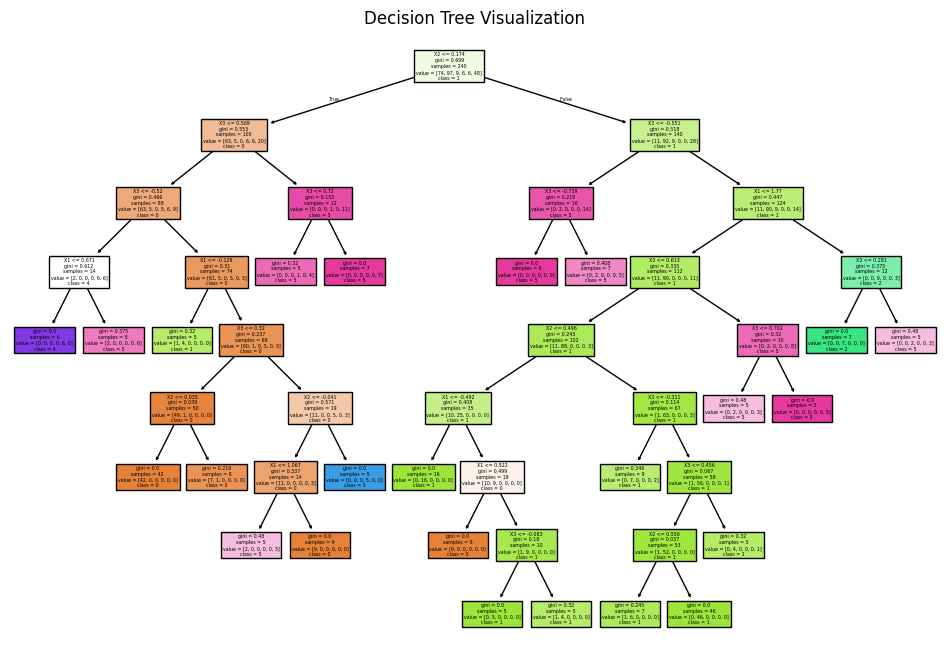

In [61]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=moon.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [62]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=moon.columns.tolist())


Optimization started

Training time: 6.84s, epochs: 161

Least training loss reached: 0.051


In [63]:
ds.print_most_important_rules(threshold=0.01)



Most important rules for class 0

	[0.788] R4: X2 < -0.055
			0: 0.634	1: 0.000	2: 0.000	3: 0.000	4: 0.230	5: 0.117	Unc: 0.019

	[0.670] R9: -0.313 < X3 < 0.003
			0: 0.449	1: 0.522	2: 0.029	3: 0.000	4: 0.000	5: 0.000	Unc: 0.000

	[0.615] R3: X1 > 1.069
			0: 0.398	1: 0.000	2: 0.539	3: 0.000	4: 0.000	5: 0.015	Unc: 0.048

	[0.607] R1: -0.115 < X1 < 0.477
			0: 0.374	1: 0.093	2: 0.000	3: 0.000	4: 0.389	5: 0.131	Unc: 0.014

	[0.490] R10: 0.003 < X3 < 0.319
			0: 0.244	1: 0.463	2: 0.279	3: 0.000	4: 0.000	5: 0.000	Unc: 0.014

	[0.444] R5: -0.055 < X2 < 0.272
			0: 0.208	1: 0.119	2: 0.009	3: 0.597	4: 0.013	5: 0.000	Unc: 0.054

	[0.351] R6: 0.272 < X2 < 0.599
			0: 0.134	1: 0.177	2: 0.348	3: 0.000	4: 0.000	5: 0.257	Unc: 0.083

	[0.132] R11: X3 > 0.319
			0: 0.017	1: 0.309	2: 0.031	3: 0.291	4: 0.000	5: 0.352	Unc: 0.000

	[0.082] R0: X1 < -0.115
			0: 0.007	1: 0.512	2: 0.000	3: 0.000	4: 0.000	5: 0.392	Unc: 0.089

	[0.062] R8: X3 < -0.313
			0: 0.004	1: 0.217	2: 0.000	3: 0.000	4: 0.255	5: 0.50

In [64]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.78


## GMM

In [65]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(moon, gmm_labels, test_size=0.2, random_state=42)


In [66]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.98


In [67]:
ripper.print_rules()


Reglas para clase: 0
[[X1=-0.84--0.25] V [X1=<-0.84] V [X2=>0.91] V [X2=0.8-0.91] V [X2=0.58-0.8] V [X1=-0.25-0.029] V [X1=0.029-0.21^X2=0.15-0.28] V [X1=0.029-0.21^X2=0.28-0.42] V [X2=0.42-0.58^X1=0.029-0.21] V [X2=0.42-0.58^X3=-0.34--0.23] V [X2=0.42-0.58^X1=0.72-0.9] V [X1=0.44-0.72^X2=0.42-0.58] V [X1=0.029-0.21^X3=0.25-0.38]]

Reglas para clase: 1
[[X2=-0.25--0.057] V [X2=-0.41--0.25] V [X2=<-0.41] V [X1=>1.75] V [X1=0.9-1.26] V [X1=0.72-0.9^X2=0.28-0.42] V [X2=-0.057-0.15^X1=0.72-0.9] V [X1=0.72-0.9^X2=0.15-0.28] V [X1=1.26-1.75]]


Decision Tree Accuracy: 0.98


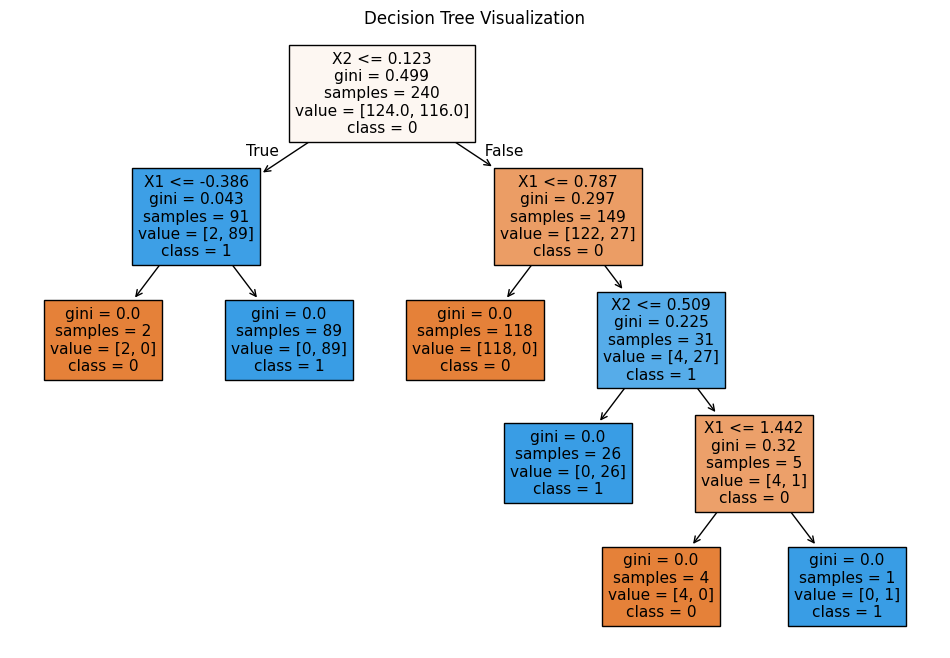

In [68]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=moon.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [69]:
ds = DSClassifierMultiQ(2, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=moon.columns.tolist())


Optimization started

Training time: 8.33s, epochs: 200

Least training loss reached: 0.062


In [70]:
ds.print_most_important_rules(threshold=0.1)



Most important rules for class 0

	[0.706] R7: X2 > 0.599
			0: 0.706	1: 0.000	Unc: 0.294

	[0.618] R0: X1 < -0.115
			0: 0.618	1: 0.000	Unc: 0.382

	[0.379] R11: X3 > 0.319
			0: 0.379	1: 0.000	Unc: 0.621

	[0.364] R9: -0.313 < X3 < 0.003
			0: 0.364	1: 0.000	Unc: 0.636

	[0.338] R6: 0.272 < X2 < 0.599
			0: 0.329	1: 0.017	Unc: 0.653

	[0.308] R10: 0.003 < X3 < 0.319
			0: 0.308	1: 0.000	Unc: 0.692

	[0.257] R1: -0.115 < X1 < 0.477
			0: 0.257	1: 0.000	Unc: 0.743

	[0.234] R8: X3 < -0.313
			0: 0.234	1: 0.000	Unc: 0.766

Most important rules for class 1

	[0.839] R4: X2 < -0.055
			0: 0.000	1: 0.839	Unc: 0.161

	[0.779] R3: X1 > 1.069
			0: 0.000	1: 0.779	Unc: 0.221

	[0.491] R2: 0.477 < X1 < 1.069
			0: 0.000	1: 0.491	Unc: 0.509

	[0.364] R5: -0.055 < X2 < 0.272
			0: 0.000	1: 0.364	Unc: 0.636


In [71]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.93
